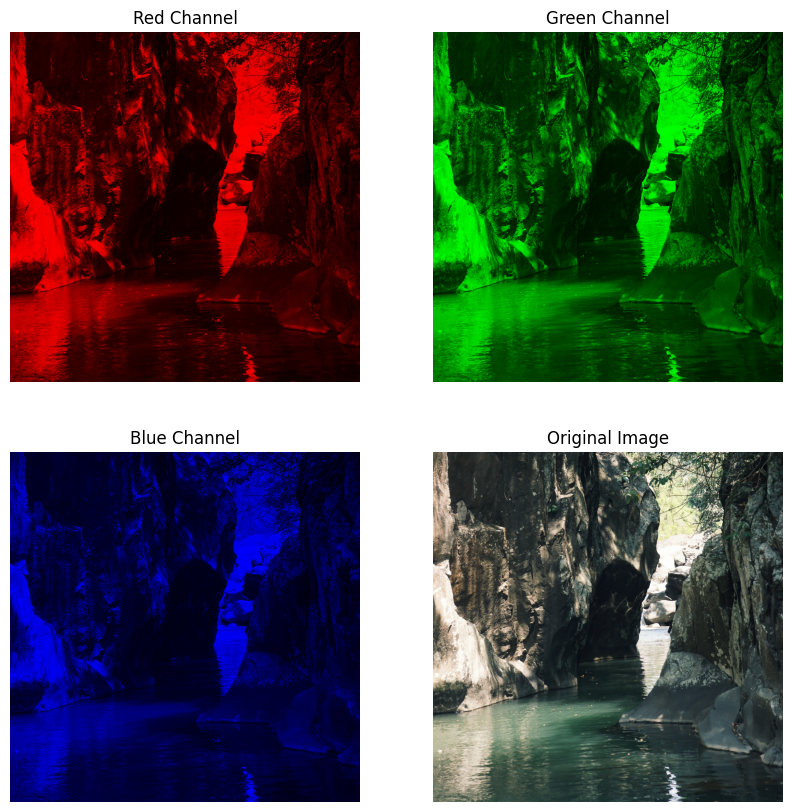

In [3]:
#dekomposisi R, G, B dari citra berwarna
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Load an image (Replace the path with the actual image file path)
image_path = '/content/drive/MyDrive/Foto/IMG_20240501_193128_494.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)

# Step 2: Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Split the image into its Red, Green, and Blue channels
R, G, B = cv2.split(image_rgb)

# Step 4: Create a zero matrix to help in visualization
zeros = np.zeros(image.shape[:2], dtype="uint8")

# Step 5: Visualize the R, G, B channels separately
plt.figure(figsize=(10, 10))

# Red channel
plt.subplot(2, 2, 1)
red_image = cv2.merge([R, zeros, zeros])  # R channel with G, B as 0
plt.imshow(red_image)
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(2, 2, 2)
green_image = cv2.merge([zeros, G, zeros])  # G channel with R, B as 0
plt.imshow(green_image)
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(2, 2, 3)
blue_image = cv2.merge([zeros, zeros, B])  # B channel with R, G as 0
plt.imshow(blue_image)
plt.title('Blue Channel')
plt.axis('off')

# Original image for comparison
plt.subplot(2, 2, 4)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.show()


1. cv2.imread(image_path):
Fungsi: Memuat gambar dari path yang diberikan.
Keterangan: Gambar yang dimuat menggunakan OpenCV secara default berada dalam format BGR (Blue, Green, Red), bukan RGB. Fungsi ini membaca gambar dan mengubahnya menjadi array numpy yang berisi nilai intensitas piksel.
2. cv2.cvtColor(image, cv2.COLOR_BGR2RGB):
Fungsi: Mengonversi gambar dari format BGR (default OpenCV) menjadi format RGB.
Keterangan: OpenCV membaca gambar dalam format BGR, tetapi untuk menampilkan gambar dengan benar menggunakan Matplotlib (atau pustaka visual lainnya), gambar harus dikonversi ke format RGB.
3. cv2.split(image_rgb):
Fungsi: Memisahkan gambar RGB menjadi tiga saluran terpisah: Red (R), Green (G), dan Blue (B).
Keterangan: Hasil dari fungsi ini adalah tiga array 2D yang masing-masing mewakili intensitas warna merah, hijau, dan biru dari gambar asli.
4. np.zeros(image.shape[:2], dtype="uint8"):
Fungsi: Membuat matriks nol berukuran sama dengan gambar, tetapi hanya untuk dua dimensi pertama (tinggi dan lebar gambar).
Keterangan: Matriks ini digunakan untuk menampilkan satu saluran warna saja. Matriks nol ini diisi pada dua saluran lainnya saat kita ingin hanya menampilkan salah satu dari saluran R, G, atau B.
5. cv2.merge([R, zeros, zeros]):
Fungsi: Menggabungkan tiga matriks untuk membuat gambar yang hanya menampilkan saluran merah (R), dengan dua saluran lainnya (G dan B) diatur menjadi nol.
Keterangan: Ini membantu memvisualisasikan hanya warna merah pada gambar.
6. plt.imshow(red_image):
Fungsi: Menampilkan gambar yang hanya berisi saluran merah (atau saluran lain sesuai dengan pemanggilan).
Keterangan: Fungsi ini menampilkan gambar yang dihasilkan oleh OpenCV dalam format yang bisa dilihat menggunakan Matplotlib. Proses ini diulang untuk saluran hijau dan biru.
7. plt.title('Red Channel'):
Fungsi: Menambahkan judul pada plot untuk mengindikasikan bahwa gambar yang ditampilkan adalah saluran merah.
Keterangan: Judul membantu membedakan saluran warna yang sedang ditampilkan.
8. plt.axis('off'):
Fungsi: Menonaktifkan sumbu (axis) pada gambar yang ditampilkan.
Keterangan: Ini dilakukan untuk menghilangkan penanda sumbu (angka di sepanjang tepi gambar), sehingga gambar terlihat lebih bersih dan fokus hanya pada visualisasi gambar.
9. plt.subplot(2, 2, x):
Fungsi: Menentukan posisi subplot di grid (2x2) untuk menampilkan beberapa gambar secara bersamaan.
Keterangan: Ini digunakan untuk menampilkan empat gambar sekaligus: gambar asli dan tiga gambar terpisah dari saluran merah, hijau, dan biru. Setiap gambar ditampilkan dalam satu posisi subplot yang ditentukan.
10. plt.show():
Fungsi: Menampilkan semua gambar yang telah diatur dalam subplot.
Keterangan: Ini menampilkan jendela gambar dengan empat gambar (gambar asli, saluran merah, hijau, dan biru).

<ipython-input-2-6c77f0bd78e1>:26: RuntimeWarning: divide by zero encountered in log
  log_mapped = c * (np.log(channel + 1))
<ipython-input-2-6c77f0bd78e1>:27: RuntimeWarning: invalid value encountered in cast
  return np.array(log_mapped, dtype=np.uint8)


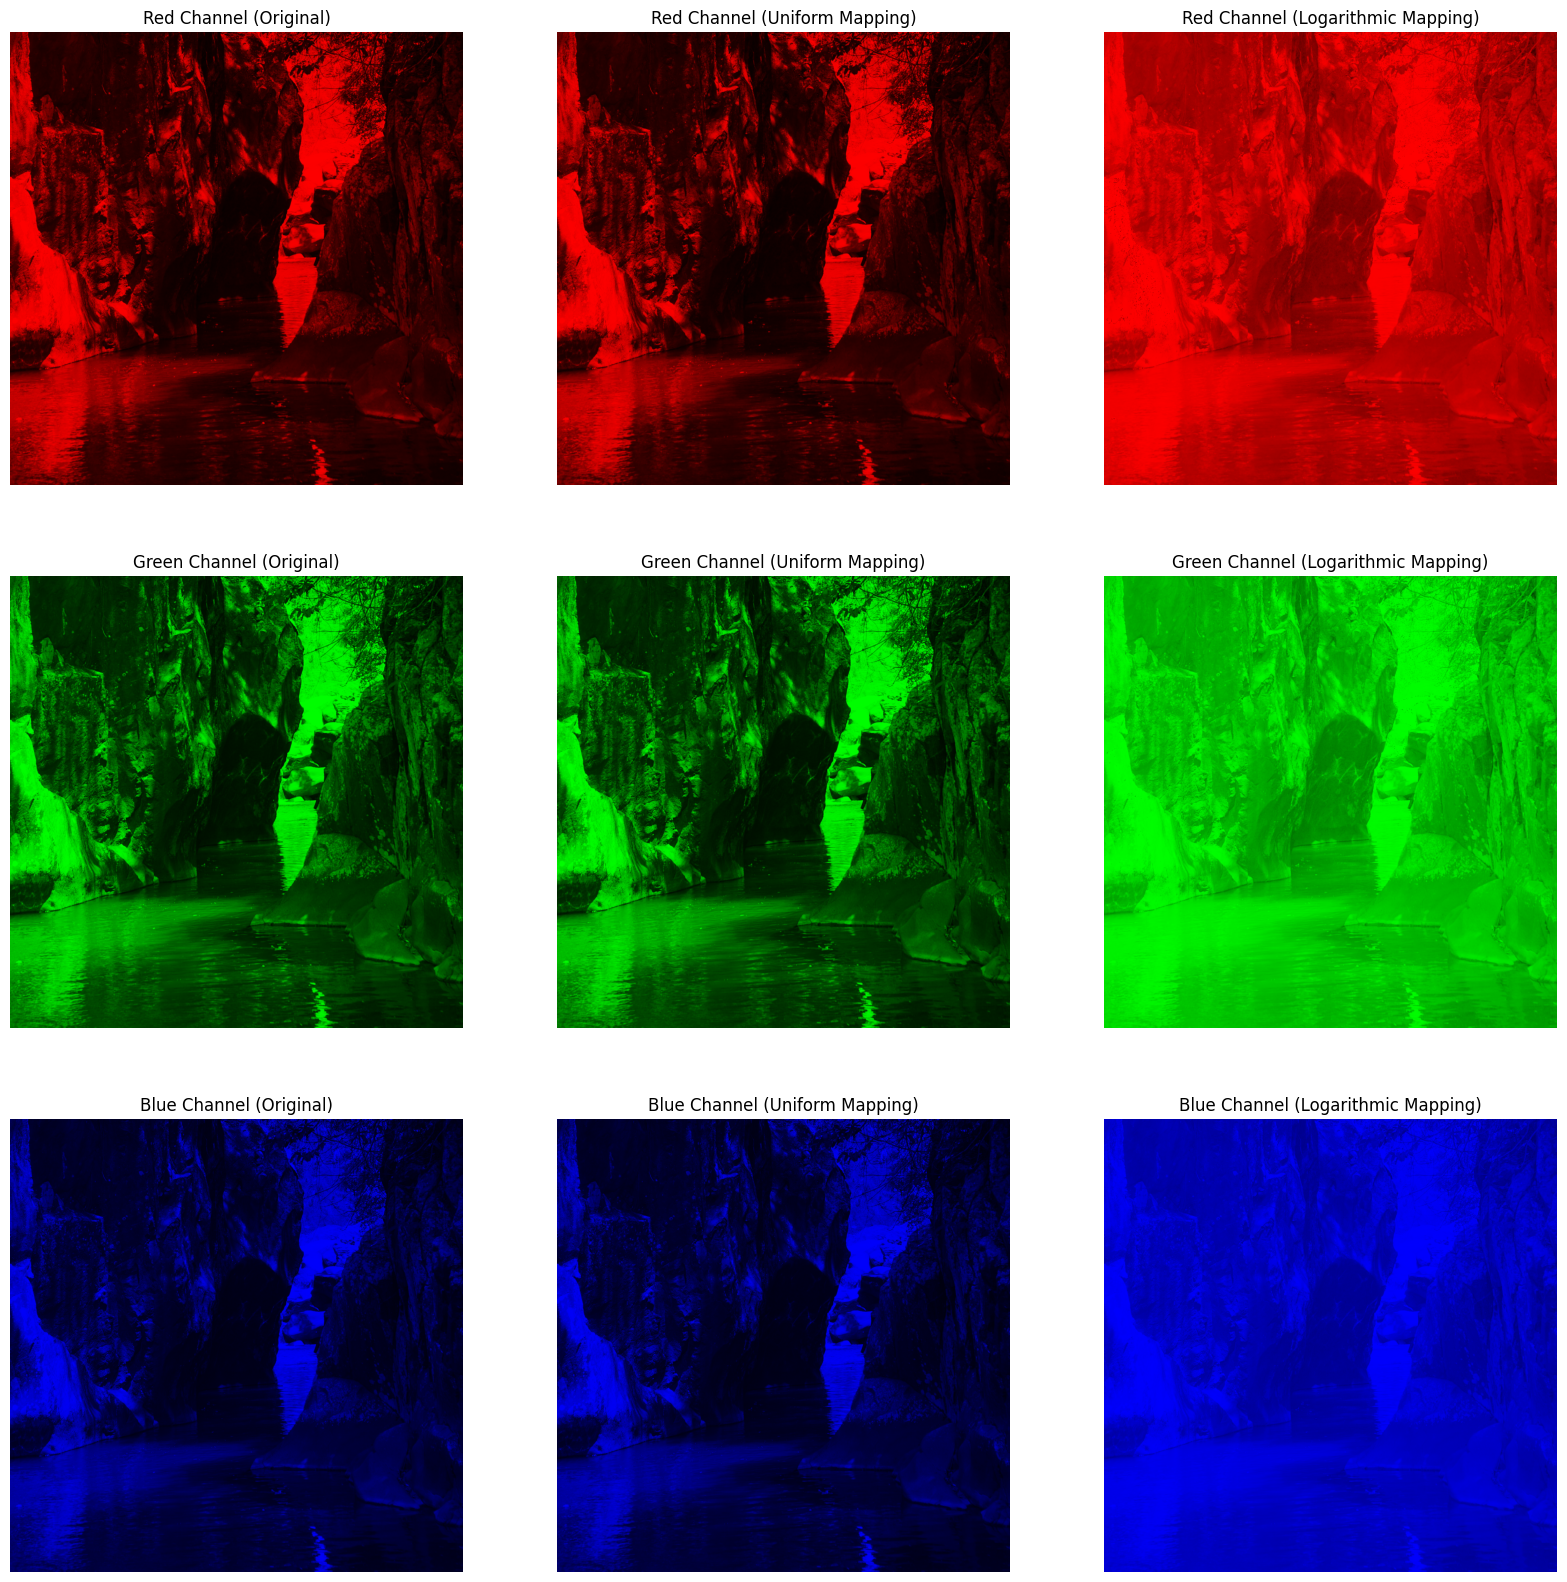

In [2]:
#Uniform Mapping dan Logarithmic Mapping
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Load an image (Replace the path with the actual image file path)
image_path = '/content/drive/MyDrive/Foto/IMG_20240501_193128_494.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)

# Step 2: Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Split the image into its Red, Green, and Blue channels
R, G, B = cv2.split(image_rgb)

# Step 4: Create a zero matrix to help in visualization
zeros = np.zeros(image.shape[:2], dtype="uint8")

# Uniform Mapping (Normalize intensity between 0 and 255)
def uniform_mapping(channel):
    return cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX)

# Logarithmic Mapping
def logarithmic_mapping(channel):
    c = 255 / np.log(1 + np.max(channel))
    log_mapped = c * (np.log(channel + 1))
    return np.array(log_mapped, dtype=np.uint8)

# Step 5: Apply Uniform and Logarithmic Mapping to each channel
R_uniform = uniform_mapping(R)
G_uniform = uniform_mapping(G)
B_uniform = uniform_mapping(B)

R_log = logarithmic_mapping(R)
G_log = logarithmic_mapping(G)
B_log = logarithmic_mapping(B)

# Step 6: Visualize the R, G, B channels separately and with Uniform/Logarithmic mappings
plt.figure(figsize=(20, 20))

# Original Red channel
plt.subplot(3, 3, 1)
red_image = cv2.merge([R, zeros, zeros])  # R channel with G, B as 0
plt.imshow(red_image)
plt.title('Red Channel (Original)')
plt.axis('off')

# Uniform Red
plt.subplot(3, 3, 2)
uniform_red_image = cv2.merge([R_uniform, zeros, zeros])
plt.imshow(uniform_red_image)
plt.title('Red Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Red
plt.subplot(3, 3, 3)
log_red_image = cv2.merge([R_log, zeros, zeros])
plt.imshow(log_red_image)
plt.title('Red Channel (Logarithmic Mapping)')
plt.axis('off')

# Original Green channel
plt.subplot(3, 3, 4)
green_image = cv2.merge([zeros, G, zeros])  # G channel with R, B as 0
plt.imshow(green_image)
plt.title('Green Channel (Original)')
plt.axis('off')

# Uniform Green
plt.subplot(3, 3, 5)
uniform_green_image = cv2.merge([zeros, G_uniform, zeros])
plt.imshow(uniform_green_image)
plt.title('Green Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Green
plt.subplot(3, 3, 6)
log_green_image = cv2.merge([zeros, G_log, zeros])
plt.imshow(log_green_image)
plt.title('Green Channel (Logarithmic Mapping)')
plt.axis('off')

# Original Blue channel
plt.subplot(3, 3, 7)
blue_image = cv2.merge([zeros, zeros, B])  # B channel with R, G as 0
plt.imshow(blue_image)
plt.title('Blue Channel (Original)')
plt.axis('off')

# Uniform Blue
plt.subplot(3, 3, 8)
uniform_blue_image = cv2.merge([zeros, zeros, B_uniform])
plt.imshow(uniform_blue_image)
plt.title('Blue Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Blue
plt.subplot(3, 3, 9)
log_blue_image = cv2.merge([zeros, zeros, B_log])
plt.imshow(log_blue_image)
plt.title('Blue Channel (Logarithmic Mapping)')
plt.axis('off')

plt.show()


1. cv2.imread(image_path):
Fungsi: Memuat gambar dari path yang diberikan dalam format BGR (Blue, Green, Red).
Keterangan: Gambar dimuat sebagai array numpy yang mewakili nilai intensitas piksel di setiap kanal warna.
2. cv2.cvtColor(image, cv2.COLOR_BGR2RGB):
Fungsi: Mengonversi gambar dari format BGR (default OpenCV) menjadi format RGB.
Keterangan: Penggunaan format RGB diperlukan untuk menampilkan gambar dengan benar di Matplotlib karena OpenCV membaca gambar dalam format BGR secara default.
3. cv2.split(image_rgb):
Fungsi: Memisahkan gambar RGB menjadi tiga saluran warna terpisah: Red (R), Green (G), dan Blue (B).
Keterangan: Hasilnya adalah tiga array 2D yang masing-masing mewakili intensitas warna merah, hijau, dan biru.
4. np.zeros(image.shape[:2], dtype="uint8"):
Fungsi: Membuat matriks nol berukuran sama dengan tinggi dan lebar gambar.
Keterangan: Matriks ini digunakan untuk menampilkan hanya satu saluran warna dengan menyetel saluran lainnya menjadi nol.
5. uniform_mapping(channel):
Fungsi: Menerapkan normalisasi seragam (uniform mapping) pada saluran warna untuk menyebarkan nilai intensitas dari 0 hingga 255.
Implementasi: Fungsi cv2.normalize digunakan untuk menormalisasi nilai intensitas pada saluran input (misalnya, R, G, atau B) sehingga seluruh nilai berada dalam rentang 0 hingga 255. Ini menghasilkan distribusi intensitas yang lebih seragam.
Keterangan: Teknik ini bermanfaat untuk memperbaiki kontras secara keseluruhan pada gambar.
6. logarithmic_mapping(channel):
Fungsi: Menerapkan pemetaan logaritmik (logarithmic mapping) pada saluran warna untuk meningkatkan kontras pada bagian gambar dengan intensitas rendah.
Implementasi:
Faktor c = 255 / np.log(1 + np.max(channel)) menghitung konstanta berdasarkan nilai maksimum pada saluran.
Fungsi logaritmik kemudian diterapkan pada setiap piksel dengan np.log(channel + 1) untuk memperbaiki detail dalam bagian gambar dengan intensitas rendah.
Keterangan: Teknik logaritmik ini efektif untuk meningkatkan visibilitas detail pada area gelap, yang biasanya tersembunyi dalam distribusi intensitas biasa.
7. R_uniform = uniform_mapping(R), G_uniform = uniform_mapping(G), B_uniform = uniform_mapping(B):
Fungsi: Menerapkan Uniform Mapping ke masing-masing saluran warna (Red, Green, Blue) secara terpisah.
Keterangan: Setiap saluran diubah sehingga intensitasnya tersebar merata antara 0 dan 255.
8. R_log = logarithmic_mapping(R), G_log = logarithmic_mapping(G), B_log = logarithmic_mapping(B):
Fungsi: Menerapkan Logarithmic Mapping ke masing-masing saluran warna (Red, Green, Blue) secara terpisah.
Keterangan: Setiap saluran diubah dengan menggunakan fungsi logaritmik untuk meningkatkan visibilitas pada intensitas rendah.
9. cv2.merge([R, zeros, zeros]), cv2.merge([zeros, G, zeros]), cv2.merge([zeros, zeros, B]):
Fungsi: Menggabungkan setiap saluran warna dengan dua matriks nol lainnya untuk menampilkan gambar satu saluran (R, G, atau B) dengan warna lainnya disetel menjadi nol.
Keterangan: Ini digunakan untuk menampilkan hasil dari masing-masing saluran secara visual.
10. plt.subplot(3, 3, x):
Fungsi: Mengatur tampilan gambar di dalam grid (3x3) untuk menampilkan sembilan gambar sekaligus (gambar asli dan hasil dari dua teknik pemetaan untuk masing-masing saluran).
Keterangan: Ini mengatur gambar sehingga dapat dibandingkan secara langsung antara gambar asli, uniform mapping, dan logarithmic mapping untuk masing-masing saluran.
11. plt.imshow(image):
Fungsi: Menampilkan gambar yang telah diproses.
Keterangan: Gambar ditampilkan dalam grid 3x3 untuk setiap kombinasi saluran warna (R, G, B) dan teknik pemetaan intensitas (uniform, logarithmic).
12. plt.title('...'):
Fungsi: Memberikan judul pada setiap subplot untuk mengidentifikasi saluran warna dan teknik pemetaan yang sedang ditampilkan.
Keterangan: Ini membantu dalam membedakan setiap gambar dengan jelas.
13. plt.axis('off'):
Fungsi: Menonaktifkan sumbu (axis) untuk gambar yang ditampilkan.
Keterangan: Ini dilakukan untuk fokus hanya pada gambar tanpa adanya garis atau nilai sumbu yang mengganggu.
14. plt.show():
Fungsi: Menampilkan semua gambar yang telah diatur di dalam subplot.
Keterangan: Ini membuka jendela gambar yang menunjukkan hasil pemrosesan dengan uniform mapping dan logarithmic mapping untuk saluran R, G, dan B.